# Prediction of Employee Attrition

### Problem Description

As the COVID-19 keeps unleashing its havoc, the world continues to get pushed into the crisis of the great economic recession, more and more companies start to cut down their underperforming employees. Companies firing hundreds and thousands of Employees is a typical headline today. Cutting down employees or reducing an employee salary is a tough decision to take. It needs to be taken with utmost care as imprecision in the identification of employees whose performance is attriting may lead to sabotaging of both employees' career and the company's reputation in the market.

This project is based on a hypothetical dataset. It has 1,470 data points (rows) and 35 features (columns) describing each employee’s background and characteristics and to analyze the factors lead to employee attrition and make prediction of it, therefore company could give an appropriate treatment for the likely attrition employee.

## Data Mining

Importing the necessary libraries and dataset for making research and checking the fileds and columns. Reading the dataset as 'Employee'and analyzing each and every column of the present data.

In [13]:
# importing libraries for data handling and analysis 
import pandas as pd
import numpy as np
# importing libraries for data visualisations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [14]:
''' reading dataset '''
df = pd.read_csv('C:\\Users\\Prash\\Downloads\\Employee-Attrition.csv')

In [15]:
''' displaying first 5 rows '''
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [16]:
''' shape of data '''
df.shape

(1470, 35)

In [17]:
''' checking null values '''
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [18]:
''' checking info of data '''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [19]:
''' checking duplicates rows '''
df[df.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [20]:
''' dropping some columns '''
df.drop(['DailyRate','EmployeeNumber','EmployeeCount', 'HourlyRate', 'JobLevel','MonthlyRate','Over18','RelationshipSatisfaction','WorkLifeBalance'], axis=1, inplace=True)

In [21]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PercentSalaryHike,PerformanceRating,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,11,3,80,0,8,0,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,23,4,80,1,10,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,15,3,80,0,7,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,11,3,80,0,8,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,12,3,80,1,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,3,Male,4,...,17,3,80,1,17,3,5,2,0,3
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,4,Male,2,...,15,3,80,1,9,5,7,7,1,7
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2,Male,4,...,20,4,80,1,6,0,6,2,0,3
1468,49,No,Travel_Frequently,Sales,2,3,Medical,4,Male,2,...,14,3,80,0,17,3,9,6,0,8


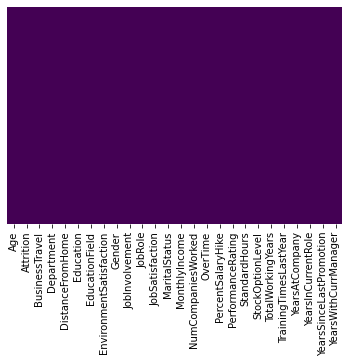

In [22]:
'''to check whether mssing values present or not'''

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

<AxesSubplot:>

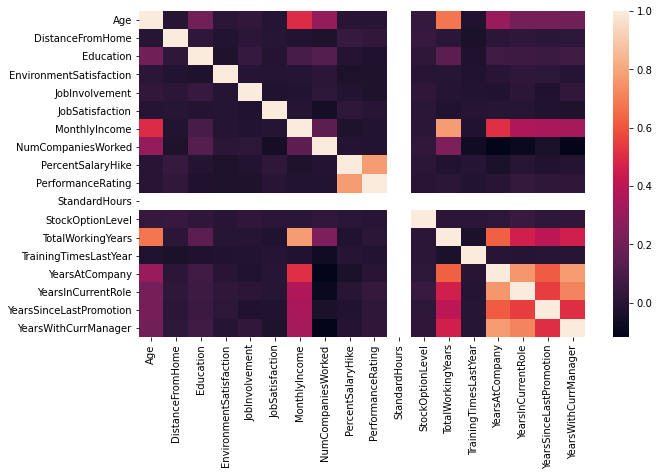

In [88]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr())

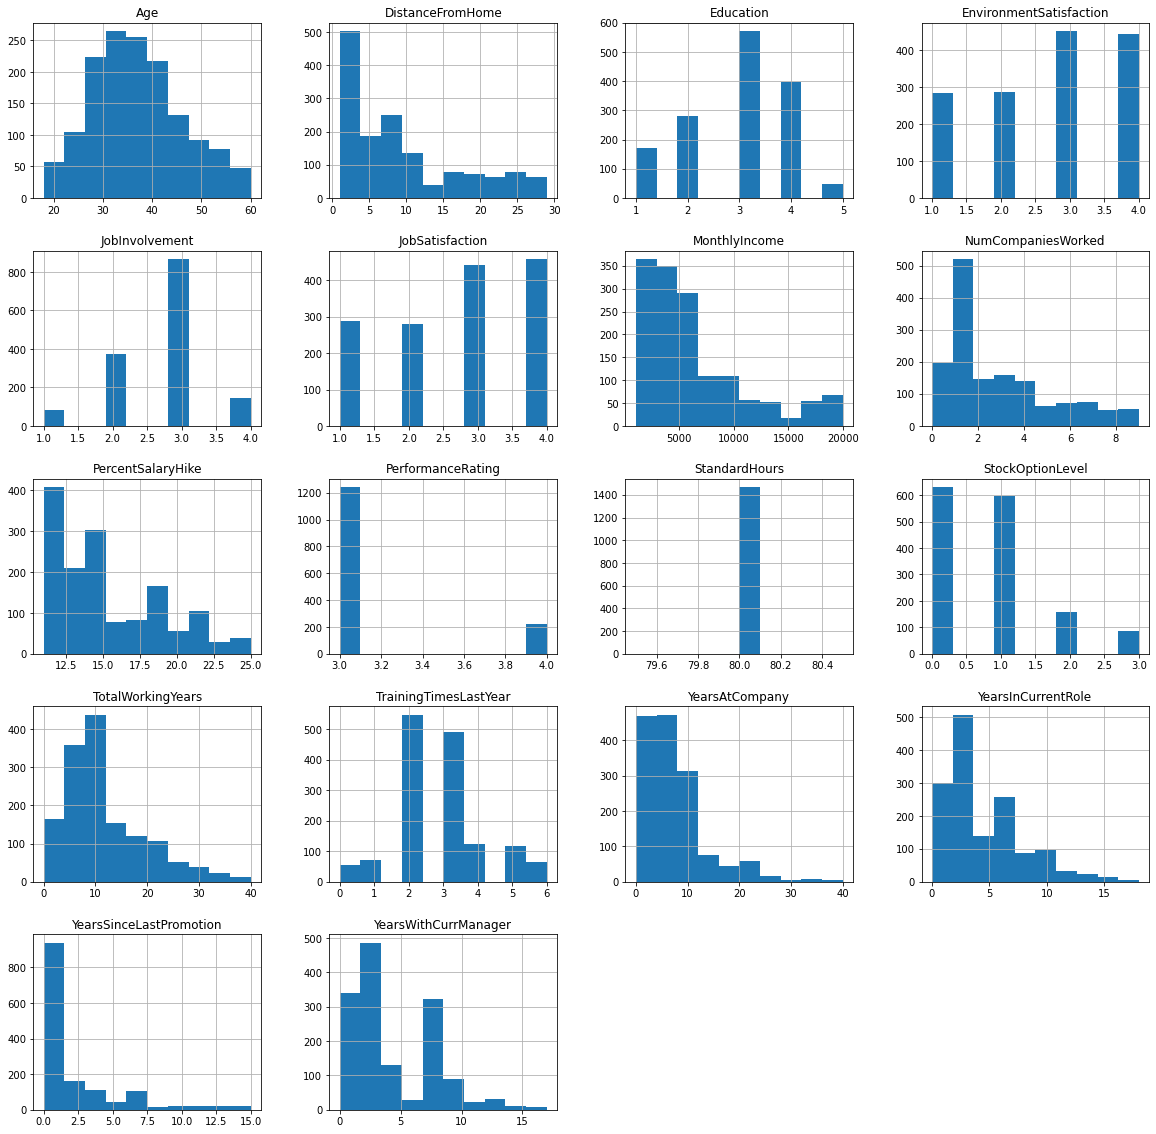

In [23]:
df.hist(figsize=(20,20));

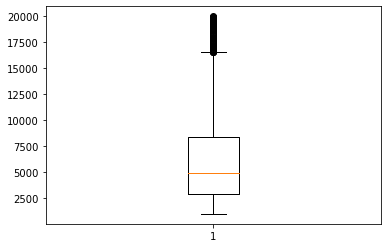

In [54]:
plt.boxplot(df.MonthlyIncome);

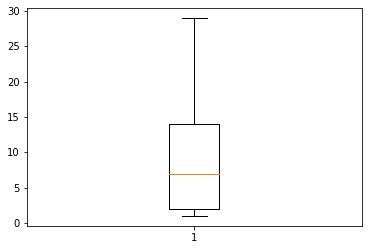

In [55]:
plt.boxplot(df.DistanceFromHome);

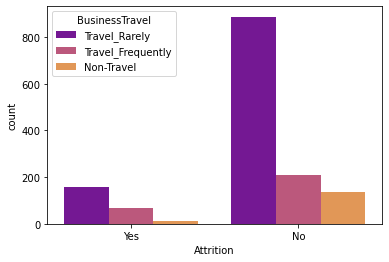

In [56]:
sns.countplot(x='Attrition',hue='BusinessTravel',data=df,palette='plasma');

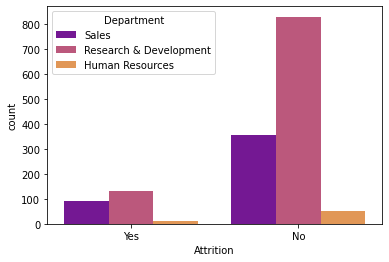

In [57]:
sns.countplot(x='Attrition',hue='Department',data=df,palette='plasma');

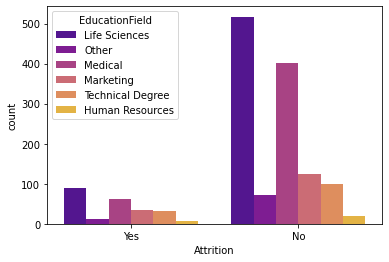

In [58]:
sns.countplot(x='Attrition',hue='EducationField',data=df,palette='plasma');

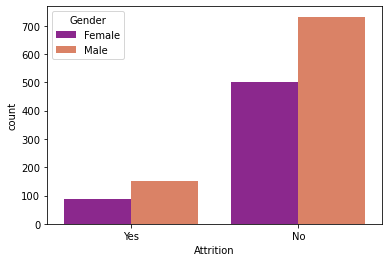

In [59]:
sns.countplot(x='Attrition',hue='Gender',data=df,palette='plasma');

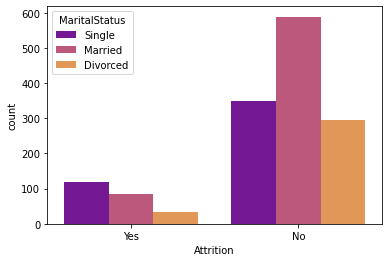

In [60]:
sns.countplot(x='Attrition',hue='MaritalStatus',data=df,palette='plasma');

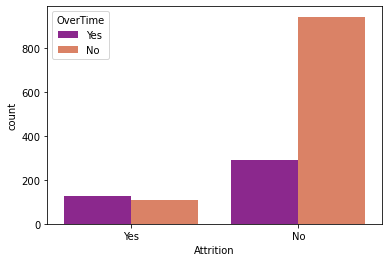

In [61]:
sns.countplot(x='Attrition',hue='OverTime',data=df,palette='plasma');

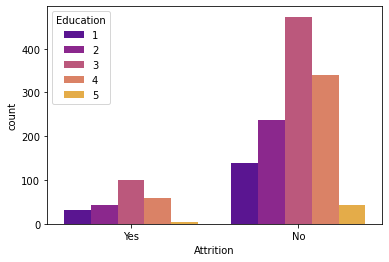

In [62]:
sns.countplot(x='Attrition',hue='Education',data=df,palette='plasma');

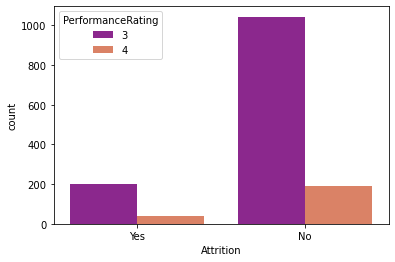

In [63]:
sns.countplot(x='Attrition',hue='PerformanceRating',data=df,palette='plasma');

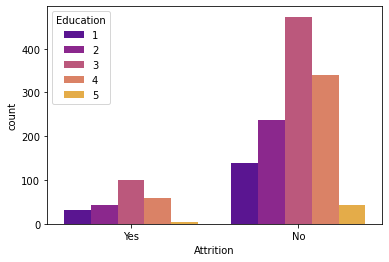

In [64]:
sns.countplot(x='Attrition',hue='Education',data=df,palette='plasma');

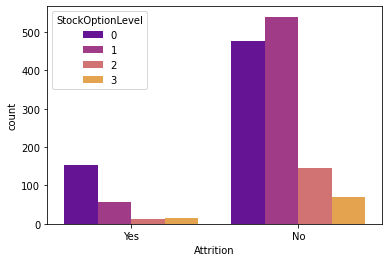

In [65]:
sns.countplot(x='Attrition',hue='StockOptionLevel',data=df,palette='plasma');

### Conculsions by EDA

Dataset contains both numerical and categorical features and target variable is categorical
Duplicates are present in the data
The dataset does not contains any missing values, and all features are of the correct data type.
We can remove Behaviour feature as it has unique value
we can also remove Employee number as it is only an ID for an employee and has no effect on his/her Attrition

### Data preprocessing

In [66]:
y = df[df.MonthlyIncome<15000].Attrition  #to remove outliers from data
x = df[df.MonthlyIncome<15000].drop(['Attrition'],axis=1)

In [67]:
x.shape

(1337, 25)

In [68]:
y.shape

(1337,)

In [69]:
'''checking skewness of numerical features''' 
x.skew()

Age                        0.543271
DistanceFromHome           0.925657
Education                 -0.299069
EnvironmentSatisfaction   -0.318404
JobInvolvement            -0.481131
JobSatisfaction           -0.335377
MonthlyIncome              1.079084
NumCompaniesWorked         1.070923
PercentSalaryHike          0.800218
PerformanceRating          1.926492
StandardHours              0.000000
StockOptionLevel           0.964842
TotalWorkingYears          1.243180
TrainingTimesLastYear      0.548174
YearsAtCompany             1.726370
YearsInCurrentRole         0.846923
YearsSinceLastPromotion    2.068886
YearsWithCurrManager       0.826815
dtype: float64

In [70]:
skewed = ['MonthlyIncome','DistanceFromHome','TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','YearsInCurrentRole',
             'PerformanceRating']
x[skewed].skew()

MonthlyIncome              1.079084
DistanceFromHome           0.925657
TotalWorkingYears          1.243180
YearsAtCompany             1.726370
YearsSinceLastPromotion    2.068886
YearsWithCurrManager       0.826815
YearsInCurrentRole         0.846923
PerformanceRating          1.926492
dtype: float64

In [71]:
'''using sqrt() to reduce skewness in the data'''

x[skewed] = np.sqrt(x[skewed])
x[skewed].skew()

MonthlyIncome              0.604893
DistanceFromHome           0.361289
TotalWorkingYears          0.060730
YearsAtCompany             0.224327
YearsSinceLastPromotion    0.756258
YearsWithCurrManager      -0.260022
YearsInCurrentRole        -0.277848
PerformanceRating          1.926492
dtype: float64

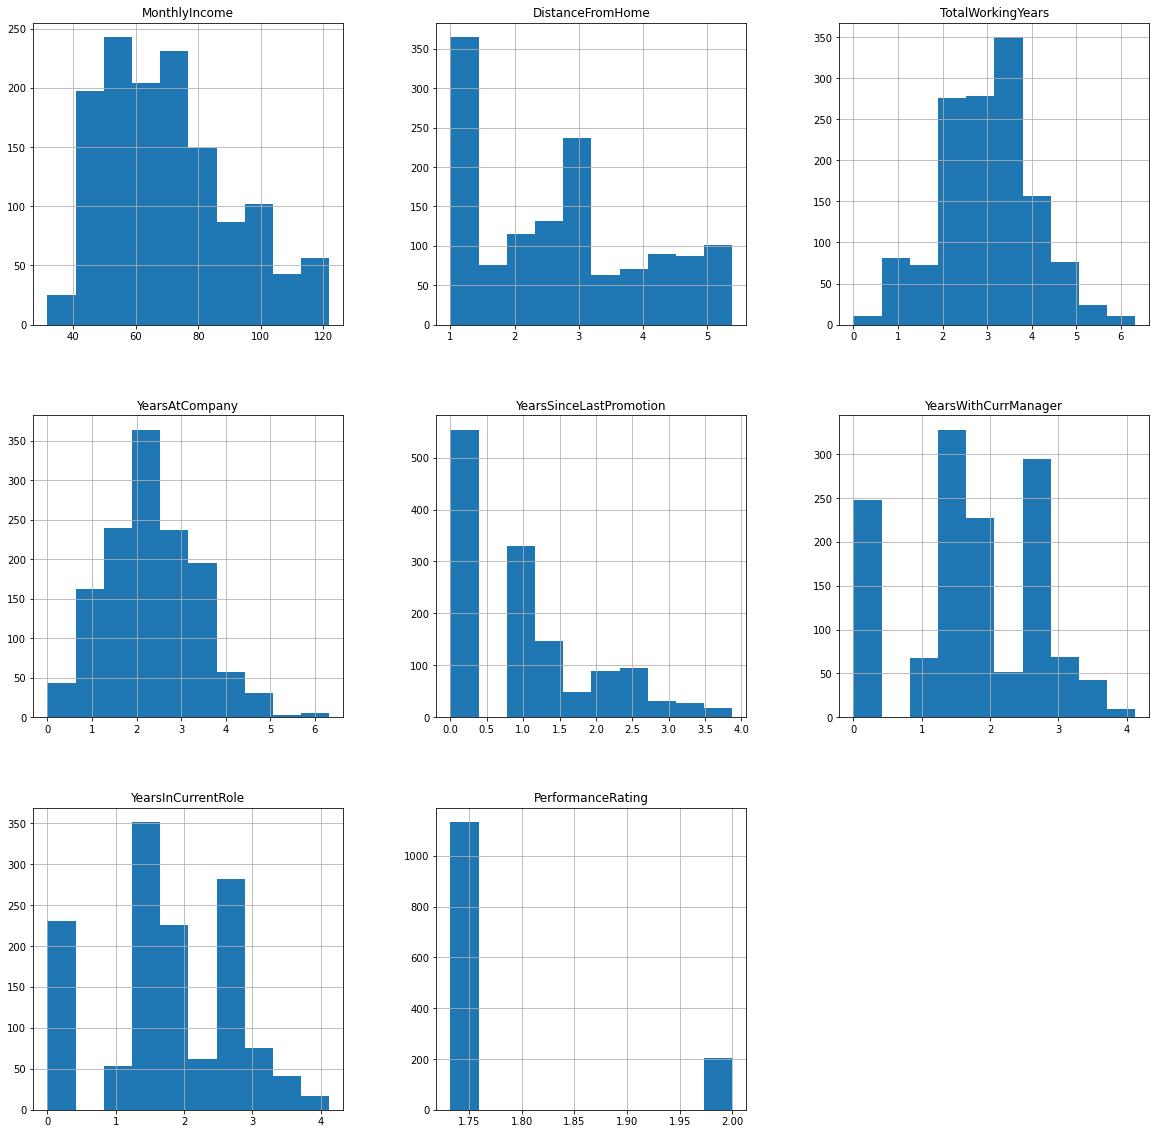

In [72]:
x[skewed].hist(figsize = (20,20));

In [73]:
'''sklearn modules for preprocessing'''

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
LE = LabelEncoder()

'''Label Encoding will be used for columns with 2 or less unique values'''

le_count = 0
for col in x.columns[1:]:
    if x[col].dtype == 'object':
        if len(list(x[col].unique())) <= 2:
            LE.fit(x[col])
            x[col] = LE.transform(x[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

2 columns were label encoded.


In [74]:
types = df.columns.to_series().groupby(df.dtypes).groups
types

{int64: ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']}

In [75]:
cols = df.columns
cols_ob = []
for j in cols :
    if df[j].dtypes=='object':
        cols_ob.append(j)
df.shape

(1470, 26)

In [76]:
cols_ob.pop(0)

'Attrition'

In [77]:
'''One hot encoding for categorical columns with more than 2 unique values'''
dummies = pd.get_dummies(x[list(set(cols_ob)-set(['Gender','OverTime']))])
dummies.head()

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0,0,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [78]:
x_merged = pd.concat([x,dummies],axis=1)
x_merged.drop(['BusinessTravel','Department','EducationField','JobRole','MaritalStatus'],axis=1,inplace=True)
x_merged.shape

(1337, 44)

In [79]:
x_merged.shape

(1337, 44)

In [80]:
c =['Behaviour','EmployeeNumber']
c = list(set(x_merged.columns)-set(c))
print(len(c))

44


### Building Machine Learning Models

In [81]:
from sklearn.ensemble import RandomForestClassifier
rfor = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',random_state = 0)

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_merged,y,test_size=0.1,random_state = 100)
print(x_train.shape,x_test.shape)

(1203, 44) (134, 44)


In [83]:
rfor.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [84]:
rfor.score(x_train, y_train)

0.9850374064837906

In [85]:
pred = rfor.predict(x_test)


In [86]:
from sklearn.metrics import accuracy_score

In [87]:
accuracy_score(y_test, pred)

0.8059701492537313

# Accuracy for Tested Data = 80.59%

## Summary

This project deepened my machine learning knowledge significantly and I strengthened my ability to apply concepts that I learned from institute, blogs and various other sources, on a different type of problem. This project had a heavy focus on the data preparation part, since this is what data scientists work on most of their time.

I started with the data exploration where I got a feeling for the dataset, checked about missing data and learned which features are important. During this process I used seaborn and matplotlib to do the visualizations. During the data preprocessing part, I computed missing values, converted features into numeric ones, grouped values into categories and created a few new features. Afterwards I started training different machine learning models, picked one of them (random forest). Then I explained how random forest works, applied train_test_split and predicted good accuracy score.